# Taichi - 12.06.2024
## Auteurs
- Miguel Jalube
- Romain Humair

## Description
Taichi est un langage de programmation intégré à python qui permet d'écrire du code hautement performant en utilisant le parrallélisme et la vectorisation. Il est principalement utilisé pour la simulation physique, la rendu d'image et l'apprentissage profond. Taichi est conçu pour être facile à utiliser et à apprendre, il est également très flexible et extensible. Il est open source et est disponible sur github.

Taichi fait du code parallele automatique, ce qui veut dire que le developpeur n'a pas besoin de spécifier quoi que ce soit, juste ajouter l'annotation @ti.kernel à la fonction qu'il veut paralléliser.

### Langage de Domaine Spécifique (DSL)
Taichi est un DSL (Domain-Specific Language) intégré dans Python. Cela signifie que même si vous programmez en Python, vous utilisez une syntaxe et des constructions spécifiques à Taichi pour certaines tâches, particulièrement celles liées aux calculs intensifs.

### Backend
Taichi permet d'écrire des programmes qui peuvent être exécutés efficacement sur des GPU (Graphics Processing Units) et des CPU (Central Processing Units). Il offre des abstractions pour paralléliser les calculs et tirer parti du matériel moderne sans nécessiter une gestion manuelle complexe des threads et des blocs.

backend compatible par système

![Taichi backend](../images/backend.PNG "Taichi backend")

Le choix du backend se fait avec `ti.init`
```python
import taichi as ti
ti.init(arch=ti.cpu)
```

### Kernel Taichi
Un kernel Taichi est une fonction annotée avec `@ti.kernel`. Ce sont les unités de base de calcul dans Taichi, où les opérations lourdes en calcul sont effectuées. Ces fonctions sont compilées et optimisées par Taichi 

```python
@ti.kernel
def my_kernel(val : int):
    # Les calculs lourds vont ici
```

### Fonction Taichi
Une fonction Taichi est une fonction appelé par un kernel ou une autre fonction Taichi et est annotée avec `@ti.func`.

```python
@ti.func
def my_func():
    # fonction appelé depuis un kernel
```


### Type de données
Contrairement a Python, les variables sont typées dans Taichi.
Taichi support les types :

![Taichi type](../images/data_type.PNG "Taichi type")

par exemple une variable float 32 bits sera du type ti.f32

### Champs de Données
Les champs Taichi (ou "fields") sont des structures de données utilisées pour stocker des tableaux de valeurs scalaires ou vectorielles, similaires aux tableaux NumPy mais optimisés pour les calculs parallèles. Vous les déclarez avec ti.field ou ti.Vector.field.

### boucles et operations vectorielles
Les boucles et les opérations vectorielles dans les kernels Taichi sont automatiquement parallélisées et optimisées. Taichi utilise une syntaxe de boucles semblable à Python, mais avec une optimisation pour les calculs parallèles.

```python
@ti.kernel
def fill_x():
    for i, j in x:  # Parcourt chaque élément du champ x
        x[i, j] = i + j  # Exemple d'opération simple
```

### Just-In-Time (JIT)
Taichi utilise la compilation Just-In-Time (JIT) pour compiler les kernels au moment de l'exécution. 




## Installation
Pour installer taichi, il suffit d'exécuter la commande suivante:
```bash
$ pip install taichi -U
```

In [ ]:
%pip install taichi

### Vérification de l'installation
Taichi dispose d'une application "Hello World" pour controler que tous fonctionne.
On y retrouve les différents éléments clé comme `@ti.func` et `@ti.kernel`, les types comme `tm.vec2` ou encore l'interface avec `ti.GUI`

In [1]:
import taichi as ti
import taichi.math as tm

ti.init(arch=ti.gpu)

n = 320
pixels = ti.field(dtype=float, shape=(n * 2, n))

@ti.func
def complex_sqr(z):  # complex square of a 2D vector
    return tm.vec2(z[0] * z[0] - z[1] * z[1], 2 * z[0] * z[1])

@ti.kernel
def paint(t: float):
    for i, j in pixels:  # Parallelized over all pixels
        c = tm.vec2(-0.8, tm.cos(t) * 0.2)
        z = tm.vec2(i / n - 1, j / n - 0.5) * 2
        iterations = 0
        while z.norm() < 20 and iterations < 50:
            z = complex_sqr(z) + c
            iterations += 1
        pixels[i, j] = 1 - iterations * 0.02

gui = ti.GUI("Julia Set", res=(n * 2, n))

i = 0
while gui.running:
    paint(i * 0.03)
    gui.set_image(pixels)
    gui.show()
    i += 1

[Taichi] version 1.7.1, llvm 15.0.1, commit 0f143b2f, win, python 3.11.9
[Taichi] Starting on arch=cuda


Si le programme s'exécute correctement, vous devriez avoir une interface avec un fractal

![Alt Text](../images/fractal.gif)

## Exemples

Les librairies ci-dessous sont nécéssaire pour les exemples qui suivent, ces librairies ne sont pas nécéssaire au bon fonctionnement de Taichi

In [ ]:
%pip install requests pillow matplotlib numpy

### Compteur de nombre premier (exemple de Taichi)

Exemple fourni par Taichi pour illustrer comment Taichi peut améliorer la performance d'un code Python.
Cet exemple compte le nombre de nombre premier inférieur à N

#### Python

In [82]:
import time

N = 1000000

def is_prime(n: int):
    result = True
    for k in range(2, int(n**0.5) + 1):
        if n % k == 0:
            result = False
            break
    return result

def count_primes(n: int) -> int:
    count = 0
    for k in range(2, n):
        if is_prime(k):
            count += 1

    return count

start = time.perf_counter()
print(f"Number of primes: {count_primes(N)}")
time_python = time.perf_counter() - start;
print(f"time elapsed: {time_python}/s")

Number of primes: 78498
time elapsed: 4.08143199999904/s


#### Taichi : CPU

In [83]:
import taichi as ti
ti.init(arch=ti.cpu)

@ti.func
def is_prime(n: int):
    result = True
    for k in range(2, int(n**0.5) + 1):
        if n % k == 0:
            result = False
            break
    return result

@ti.kernel
def count_primes(n: int) -> int:
    count = 0
    for k in range(2, n):
        if is_prime(k):
            count += 1

    return count

start = time.perf_counter()
print(f"Number of primes: {count_primes(N)}")
time_cpu = time.perf_counter() - start
print(f"time elapsed: {time_cpu}/s")

[Taichi] Starting on arch=x64
Number of primes: 78498
time elapsed: 0.08143159999963245/s


#### Taichi : GPU

In [84]:
import taichi as ti
ti.init(arch=ti.gpu)

@ti.func
def is_prime(n: int):
    result = True
    for k in range(2, int(n**0.5) + 1):
        if n % k == 0:
            result = False
            break
    return result

@ti.kernel
def count_primes(n: int) -> int:
    count = 0
    for k in range(2, n):
        if is_prime(k):
            count += 1

    return count

start = time.perf_counter()
print(f"Number of primes: {count_primes(N)}")
time_gpu = time.perf_counter() - start
print(f"time elapsed: {time_gpu}/s")

[Taichi] Starting on arch=cuda
Number of primes: 78498
time elapsed: 0.10463290000006964/s


#### Taichi : Cuda

In [85]:
import taichi as ti
ti.init(arch=ti.cuda)

@ti.func
def is_prime(n: int):
    result = True
    for k in range(2, int(n**0.5) + 1):
        if n % k == 0:
            result = False
            break
    return result

@ti.kernel
def count_primes(n: int) -> int:
    count = 0
    for k in range(2, n):
        if is_prime(k):
            count += 1

    return count

start = time.perf_counter()
print(f"Number of primes: {count_primes(N)}")
time_cuda = time.perf_counter() - start
print(f"time elapsed: {time_cuda}/s")

[Taichi] Starting on arch=cuda
Number of primes: 78498
time elapsed: 0.09687579999990703/s


#### Taichi : Vulkan

In [86]:
import taichi as ti
ti.init(arch=ti.vulkan)

@ti.func
def is_prime(n: int):
    result = True
    for k in range(2, int(n**0.5) + 1):
        if n % k == 0:
            result = False
            break
    return result

@ti.kernel
def count_primes(n: int) -> int:
    count = 0
    for k in range(2, n):
        if is_prime(k):
            count += 1

    return count

start = time.perf_counter()
print(f"Number of primes: {count_primes(N)}")
time_vulkan = time.perf_counter() - start
print(f"time elapsed: {time_vulkan}/s")

[Taichi] Starting on arch=vulkan
Number of primes: 78498
time elapsed: 0.04880860000048415/s


#### Comparaison

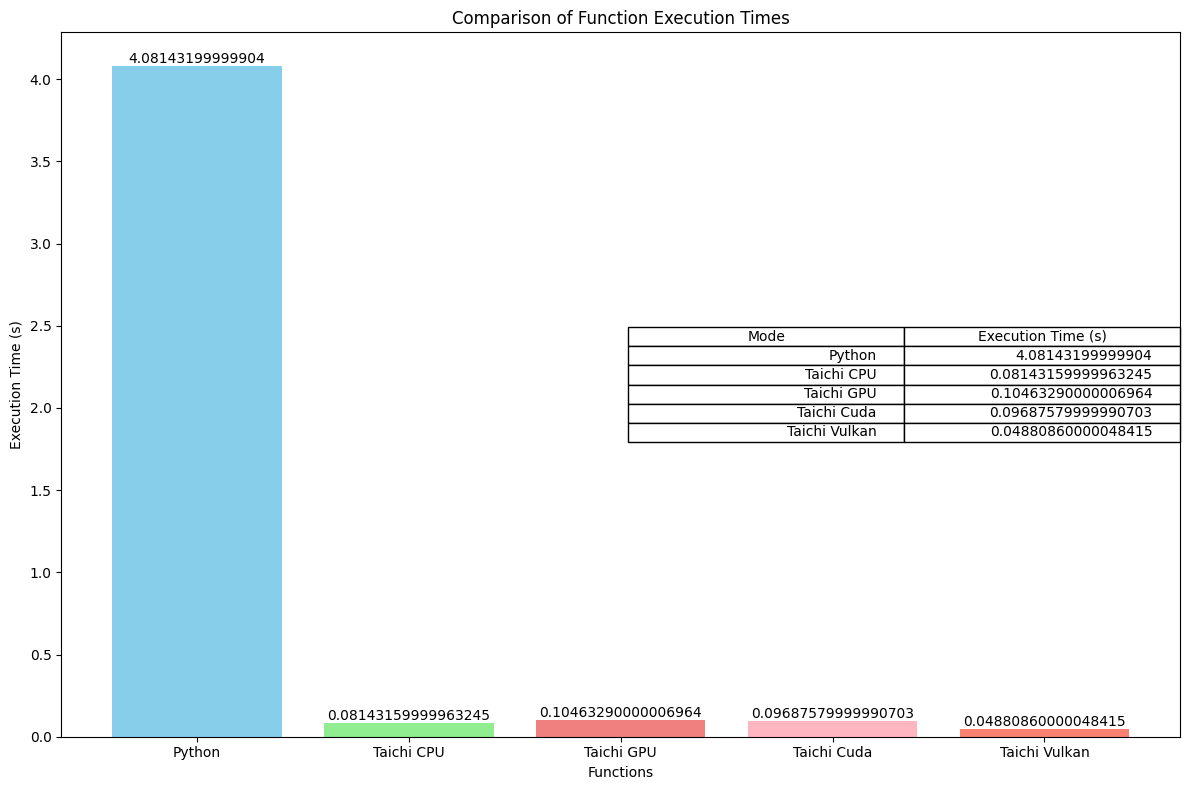

In [87]:
import matplotlib.pyplot as plt

# Execution times
execution_times = [time_python, time_cpu, time_gpu, time_cuda, time_vulkan]

function_names = ['Python', 'Taichi CPU', 'Taichi GPU', 'Taichi Cuda', 'Taichi Vulkan']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'salmon']

# bar chart
# bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(function_names, execution_times, color=colors)
ax.set_xlabel('Functions')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Comparison of Function Execution Times')

for bar, time in zip(bars, execution_times):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{time}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes
table_data = list(zip(function_names, execution_times))
plt.table(cellText=table_data, colLabels=['Mode', 'Execution Time (s)'], loc='center')
plt.tight_layout()

plt.show()

On peut observer que le temps d'exécution est significativement réduit avec Taichi

Même observation mais en ne gardant que les backends Taichi

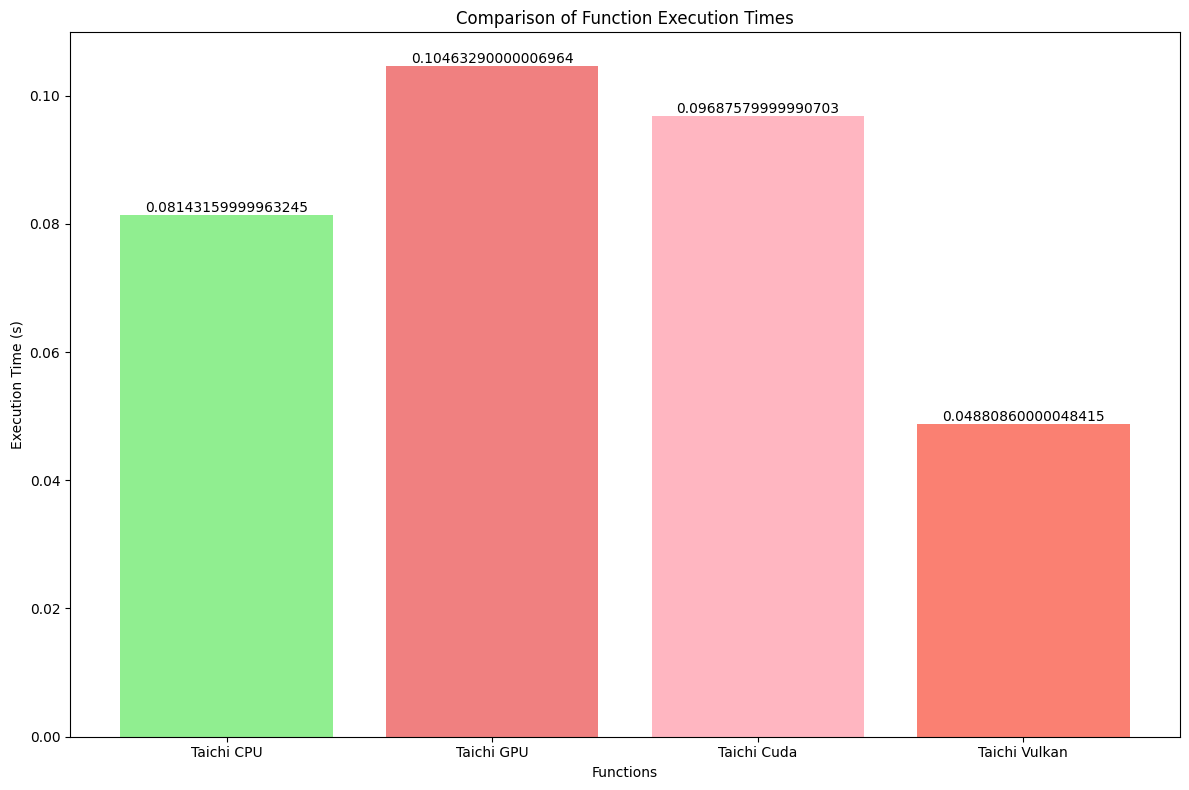

In [88]:
import matplotlib.pyplot as plt

# Execution times
execution_times = [time_cpu, time_gpu, time_cuda, time_vulkan]

function_names = ['Taichi CPU', 'Taichi GPU', 'Taichi Cuda', 'Taichi Vulkan']
colors = ['lightgreen', 'lightcoral', 'lightpink', 'salmon']


# bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(function_names, execution_times, color=colors)
ax.set_xlabel('Functions')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Comparison of Function Execution Times')

for bar, time in zip(bars, execution_times):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{time}', ha='center', va='bottom')

plt.tight_layout()

plt.show()

Pour ce cas applicatif, le backend Vulkan est plus performant.
Les backends GPU et Cuda utilise la même architecture

### Calculs de matrices

#### Python

In [92]:
import random
import time


def matrix_multiplication():
    for i in range(N):
        for j in range(N):
            temp = 0.0
            for k in range(N):
                temp += A[i][k] * B[k][j]
            result[i][j] = temp


# Définir la taille des matrices
N = 500

# Générer des matrices aléatoires
A = [[random.random() for _ in range(N)] for _ in range(N)]
B = [[random.random() for _ in range(N)] for _ in range(N)]
result = [[0 for _ in range(N)] for _ in range(N)]

# Effectuer la multiplication des matrices
start = time.perf_counter()
matrix_multiplication()
time_python2 = time.perf_counter() - start

# for row in result[:5]:
#     print(row[:5])

print(f"time elapsed: {time_python2}/s")

time elapsed: 14.123857399999906/s


#### Taichi : GPU

In [93]:
import taichi as ti
import time

ti.init(arch=ti.gpu)

@ti.kernel
def matrix_multiplication():
    for i in range(N):
        for j in range(N):
            temp = 0.0
            for k in range(N):
                temp += A[i, k] * B[k, j]
            result[i, j] = temp


# Définir la taille des matrices
N = 500

# Définir les matrices en tant que champs Taichi
A = ti.field(ti.f32, shape=(N, N))
B = ti.field(ti.f32, shape=(N, N))
result = ti.field(ti.f32, shape=(N, N))

# Remplir les matrices avec des valeurs aléatoires
A.from_numpy(np.random.rand(N, N).astype(np.float32))
B.from_numpy(np.random.rand(N, N).astype(np.float32))

# Effectuer la multiplication des matrices avec Taichi
start = time.perf_counter()
matrix_multiplication()
time_taichi = time.perf_counter() - start

# print(result.to_numpy())

print(f"time elapsed: {time_taichi}/s")

[Taichi] Starting on arch=cuda
time elapsed: 0.07734379999965313/s


#### Python + Numpy

In [94]:
import numpy as np
import time

N = 500

# Définir deux matrices de taille plus importante
A = np.random.rand(N, N)
B = np.random.rand(N, N)

print(A)

# Multiplication de matrices avec NumPy
start = time.perf_counter()
result = np.dot(A, B)
time_numpy = time.perf_counter() - start

# print(result)

print(f"time elapsed: {time_numpy}/s")

[[0.9524906  0.24293516 0.97852597 ... 0.09861398 0.35515075 0.99541294]
 [0.6830298  0.63281913 0.0118799  ... 0.17070792 0.48118077 0.80409534]
 [0.85134215 0.70469624 0.1059937  ... 0.81064557 0.25958534 0.35278382]
 ...
 [0.64857507 0.80519082 0.83477724 ... 0.54586227 0.54951771 0.60987288]
 [0.24436528 0.47141184 0.5056125  ... 0.35094093 0.95560906 0.8831467 ]
 [0.120994   0.41617938 0.03950257 ... 0.86336342 0.53029776 0.86404379]]
time elapsed: 0.0030559999995602993/s


#### Comparaison

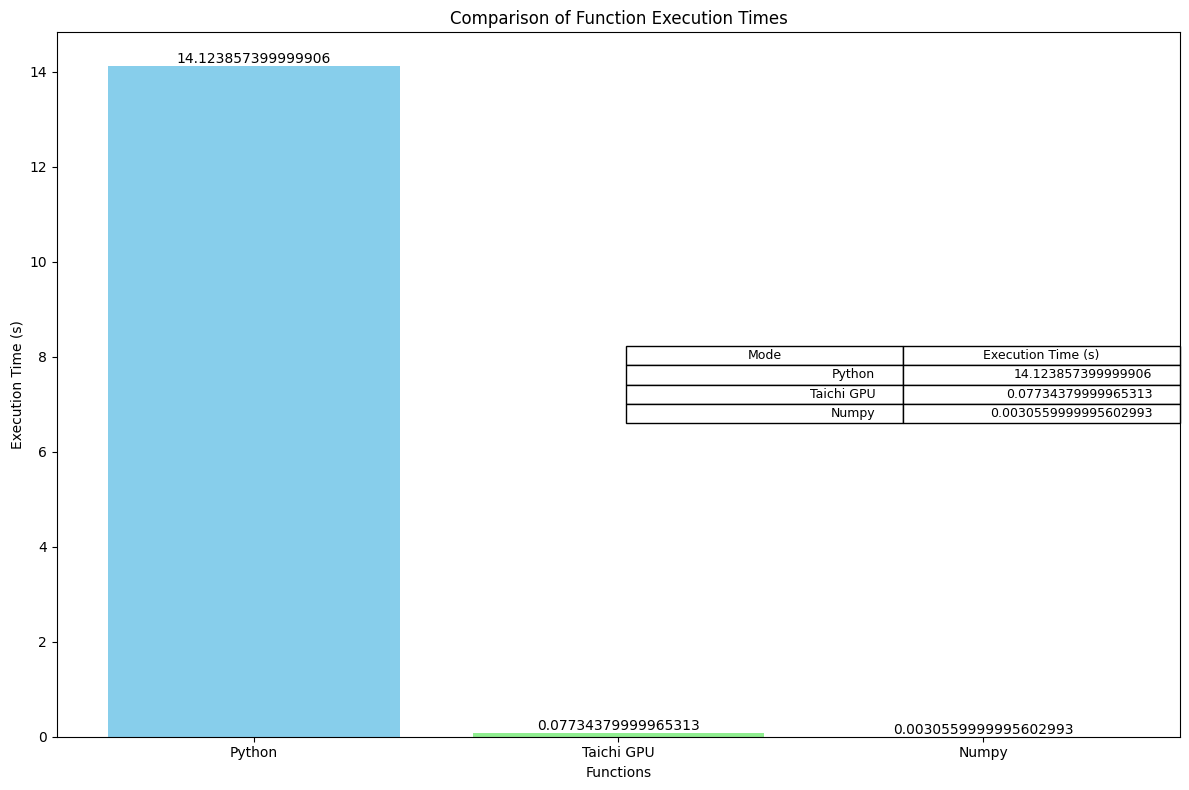

In [95]:
import matplotlib.pyplot as plt

# Execution times
execution_times = [time_python2, time_taichi, time_numpy]

function_names = ['Python', 'Taichi GPU', 'Numpy']
colors = ['skyblue', 'lightgreen', 'lightcoral']

# bar chart
# bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(function_names, execution_times, color=colors)
ax.set_xlabel('Functions')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Comparison of Function Execution Times')

for bar, time in zip(bars, execution_times):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{time}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes
table_data = list(zip(function_names, execution_times))
plt.table(cellText=table_data, colLabels=['Mode', 'Execution Time (s)'], loc='center')
plt.tight_layout()

plt.show()

### Traitement d'image
Comparaison entre les performances de taichi et python sur un traitement d'images en appliquant un filtre de convolution sur une image.

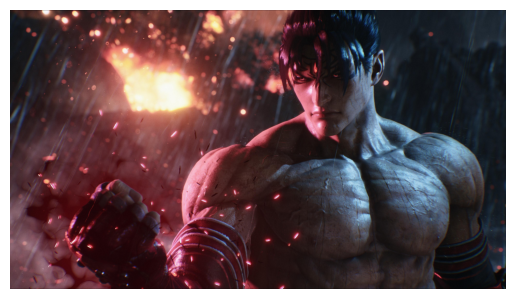

In [96]:
import time
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# variables globales

# l'imge est en 4k
url = "https://images7.alphacoders.com/127/1272410.jpg"

def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img
    
# afficher une image depuis le repertoire local courant
def display_image_from_local(filename):
    img = Image.open(filename)
    # sans les axes
    plt.axis('off')
    plt.imshow(np.array(img), cmap='gray')
    plt.show()
    
# enregistrer l'image
def save_image(image, filename):
    image.save(filename)
    
# Charger l'image
image = load_image_from_url(url)

# Sauvegarder l'image
save_image(image, "../images/image.jpg")

display_image_from_local("../images/image.jpg")

#### Python grayscale

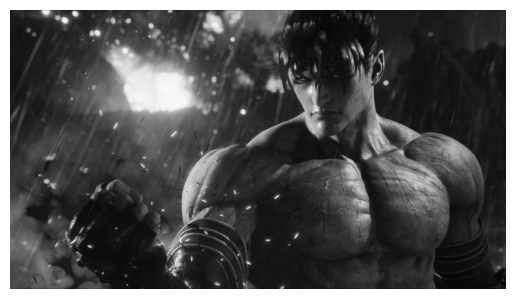

Temps de conversion: 0.288999s


In [97]:
def to_greyscale(image):
    # Convertir l'image en tableau numpy
    img_array = np.array(image)
    
    # Vérifier si l'image a une couche alpha (RGBA) et l'enlever si c'est le cas
    if img_array.shape[2] == 4:
        img_array = img_array[:, :, :3]
    
    # Utiliser la formule de luminance pour convertir en niveaux de gris
    greyscale_array = 0.299 * img_array[:, :, 0] + 0.587 * img_array[:, :, 1] + 0.114 * img_array[:, :, 2]
    
    # Convertir le tableau numpy en image PIL
    greyscale_image = Image.fromarray(greyscale_array.astype('uint8'))
    
    return greyscale_image

# Convertir en niveaux de gris manuellement
start_time = time.time()
greyscale_image = to_greyscale(image)
time_gray_python = time.time() - start_time

save_image(greyscale_image, "../images/vanila_greyscale.jpg")

display_image_from_local("../images/vanila_greyscale.jpg")

# Temps de conversion
print(f"Temps de conversion: {time_gray_python:.6f}s")

#### Taichi grayscale

[Taichi] Starting on arch=cuda


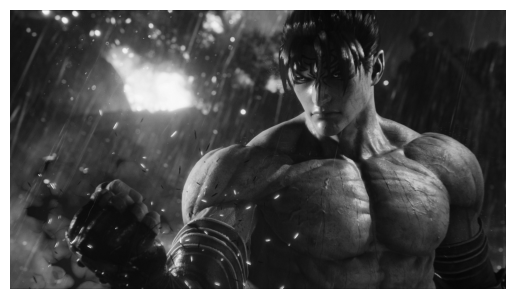

Temps de conversion: 0.263000s


In [98]:
# init taichi
import taichi as ti

ti.init(arch=ti.gpu)

def to_greyscale_ti(image):
    # Convertir l'image en tableau numpy
    img_array = np.array(image)
    
    # Vérifier si l'image a une couche alpha (RGBA) et l'enlever si c'est le cas
    if img_array.shape[2] == 4:
        img_array = img_array[:, :, :3]
    
    # Dimensions de l'image
    h, w, c = img_array.shape
    
    # Définir les champs Taichi pour l'image couleur et l'image en niveaux de gris
    color_image = ti.Vector.field(3, dtype=ti.u8, shape=(h, w))
    greyscale_image = ti.field(dtype=ti.u8, shape=(h, w))
    
    # Copier les données de l'image couleur dans le champ Taichi
    color_image.from_numpy(img_array)
    
    # Kernel Taichi pour convertir l'image en niveaux de gris
    @ti.kernel
    def to_greyscale():
        for i, j in ti.ndrange(h, w):
            r = color_image[i, j][0]
            g = color_image[i, j][1]
            b = color_image[i, j][2]
            grey = ti.u8(0.299 * r + 0.587 * g + 0.114 * b)
            greyscale_image[i, j] = grey
    
    # Exécuter le kernel
    to_greyscale()
    
    # Convertir le champ Taichi en tableau numpy
    greyscale_array = greyscale_image.to_numpy()
    
    # Convertir le tableau numpy en image PIL
    greyscale_image_pil = Image.fromarray(greyscale_array)
    
    return greyscale_image_pil

# Convertir en niveaux de gris manuellement
start_time = time.time()
greyscale_image_ti = to_greyscale_ti(image)
time_gray_taichi = time.time() - start_time

# enregistrer l'image
save_image(greyscale_image_ti, "../images/taichi_greyscale.jpg")

display_image_from_local("../images/taichi_greyscale.jpg")

# Temps de conversion
print(f"Temps de conversion: {time_gray_taichi:.6f}s")

#### Comparaison

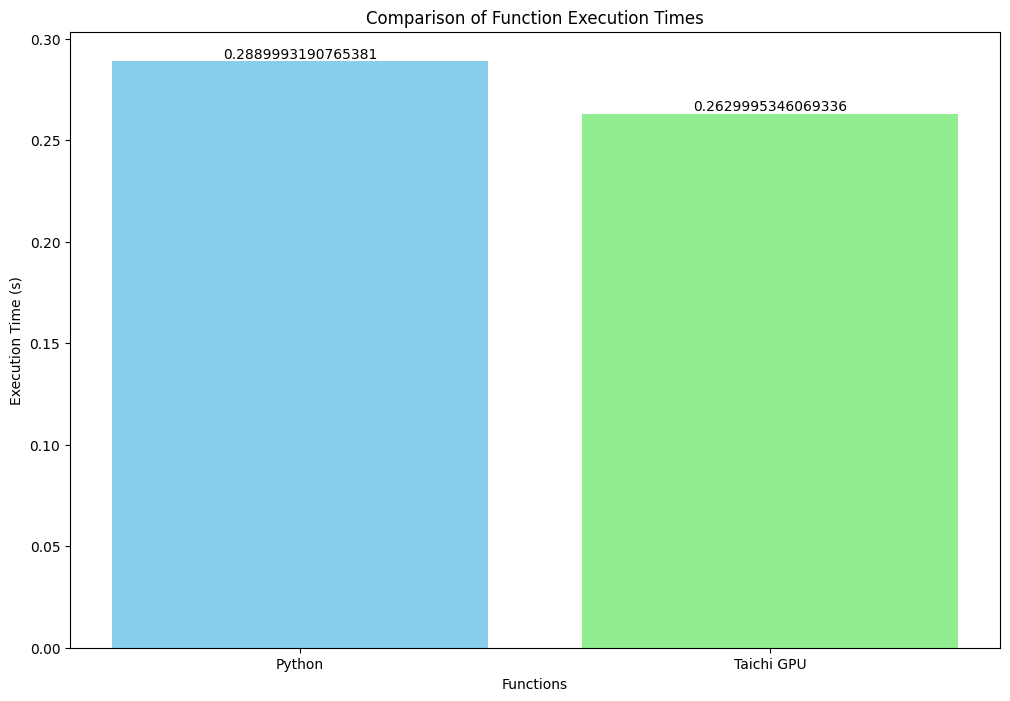

In [99]:
import matplotlib.pyplot as plt

# Execution times
execution_times = [time_gray_python, time_gray_taichi]

function_names = ['Python', 'Taichi GPU']
colors = ['skyblue', 'lightgreen']

# bar chart
# bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(function_names, execution_times, color=colors)
ax.set_xlabel('Functions')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Comparison of Function Execution Times')

for bar, time in zip(bars, execution_times):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{time}', ha='center', va='bottom')

plt.show()

Performance équivalente entre python et taichi

## Conclusion

Selon le type d'application et le type de calcul il est possible de grandement améliorer les performances grace à Taichi.
Numpy étant basé sur des bibliothèques optimisées en C et Fortran, ce qui lui permet de bénéficier pleinement de la vectorisation, se montre plus performant que Taichi dans certains cas comme des calculs sur des tableaux.

Contrairement a ce qui est mis en avant, Taichi n'est pas si simple a prendre en main. Nous avons passé beaucoup de temps à essayer de convertir des codes pythons pour Taichi sans forcément finir par y arriver.

Taichi semble être un outil très puissant pour le calcul parallèle et la vectorisation, mais il semble avoir des problèmes avec les types de données et les calculs itératifs. Il est donc difficile de comparer les gains de performances avec python de base. L'utilisation de Taichi est plus adaptée à du traitement graphique ou calcul vectoriel.

